In [1]:
import glob

In [2]:
from astroquery.svo_fps import SvoFps

In [3]:
jfilts = SvoFps.get_filter_list('JWST')
jfilts.add_index('filterID')

In [4]:
import numpy as np

In [5]:
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
from astropy import units as u

In [6]:
ext = CT06_MWGC()
ext(2.12*u.um) * 30, ext(4.8*u.um) * 30

(3.4232313962264147, 1.454796)

In [7]:
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
geoms

['s---s-i',
 's-pbsmi',
 's-p-hmi',
 'spu-hmi',
 'spubsmi',
 's-pbhmi',
 's-u-smi',
 's-ubhmi',
 'spu-smi',
 's-u-hmi',
 's-ubsmi',
 'sp--hmi',
 'sp--s-i',
 'spubhmi',
 's---smi',
 'sp--smi',
 's-p-smi',
 'sp--h-i']

In [8]:
from astropy.table import Table
f480s = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/{geom}/convolved/JWST/NIRCam.F480M.fits')
         for geom in geoms}

In [9]:
f212s = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/{geom}/convolved/JWST/NIRCam.F212N.fits')
         for geom in geoms}

In [10]:
v1 = Table.read('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s---s-i/convolved/I1.fits')
v2 = Table.read('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s---s-i/convolved/Spitzer/IRAC.I1.fits')

In [11]:
path='/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/spubsmi/convolved/JWST/'
f770 = Table.read(f'{path}/MIRI.F770W.fits')
f470 =  Table.read(f'{path}/NIRCam.F470N.fits')

In [12]:
augpars_dict = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
                for geom in geoms}
for key in augpars_dict:
    augpars_dict[key].add_index("MODEL_NAME")

In [13]:
augpars_dict['s---s-i'][:5]

<Table length=5>
 MODEL_NAME star.radius star.temperature scattering inclination   Model Luminosity 
                                                                       solLum      
  bytes20     float64       float64        int64      float64         float64      
----------- ----------- ---------------- ---------- ----------- -------------------
01QyhoBc_01      0.2728           4888.0          1        45.0 0.03827429493798022
01Xx6elC_01       0.383          12050.0          1        45.0  2.7863740310410456
03ZZRVTe_01       31.22           4967.0          1        45.0   534.4857312835463
03amqKIp_01       13.81           7891.0          1        45.0   666.2070265981496
03dloFhH_01       44.63           6450.0          1        45.0  3105.8917167595805

# Theo's classification downselection

 * MS: 0 (below) / 1 (on/above) / -1 (too cold)
 * Stage: 0 (0) / 1 (I) / 2 (II) / 3 (III) / -1 (none)
 * Class: 0 (0) / 1 (I) / 2 (Flat) / 3 (II) / 4 (III) / -1 (none)

In [14]:
classification_dict = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/real_models/{geom}.fits')
                       for geom in geoms}
for key in classification_dict:
    classification_dict[key].add_index("Model Name")

In [15]:
f470s = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/{geom}/convolved/JWST/NIRCam.F470N.fits')
         for geom in geoms}

In [16]:
f470s['sp--h-i'][:5]

<Table length=5>
 MODEL_NAME                TOTAL_FLUX                             TOTAL_FLUX_ERR             
                              mJy                                      mJy                   
  bytes30                 float64[20]                              float64[20]               
----------- ---------------------------------------- ----------------------------------------
016nTMSL_01 10.932071685791016 .. 10.932223320007324  10.926067352294922 .. 10.92621898651123
016nTMSL_02  10.94102954864502 .. 10.941184997558594 10.935020446777344 .. 10.935175895690918
016nTMSL_03 10.976465225219727 .. 10.976628303527832 10.970436096191406 .. 10.970599174499512
016nTMSL_04 11.043643951416016 .. 11.043824195861816 11.037578582763672 .. 11.037758827209473
016nTMSL_05 11.080031394958496 .. 11.080085754394531 11.073945999145508 .. 11.074000358581543

In [17]:
import pylab as pl
import numpy as np
from astropy import units as u

     TOTAL_FLUX     
        mJy         
--------------------
 0.23774708807468414
 0.03695498779416084
   1.045137882232666
 0.16104896366596222
 0.16494974493980408
 0.17946027219295502
 0.20028778910636902
 0.04568187892436981
0.023020772263407707
0.021588226780295372
0.015565724112093449
 0.19279153645038605
 0.22218115627765656
                 ...
   0.957229733467102
 0.15413007140159607
  0.6274082660675049
  0.8330541849136353
   1.728190541267395
 0.05130075663328171
 0.07177084684371948
  0.5282512903213501
  0.8961541056632996
 0.16798868775367737
  1.6596473455429077
 0.24817757308483124
  1.3209617137908936
Length = 1081 rows
     TOTAL_FLUX    
        mJy        
-------------------
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                ...
           

/home/t.yoo/anaconda3/lib/python3.9/site-packages/astropy/units/function/logarithmic.py:66: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/home/t.yoo/anaconda3/lib/python3.9/site-packages/astropy/units/function/logarithmic.py:66: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))


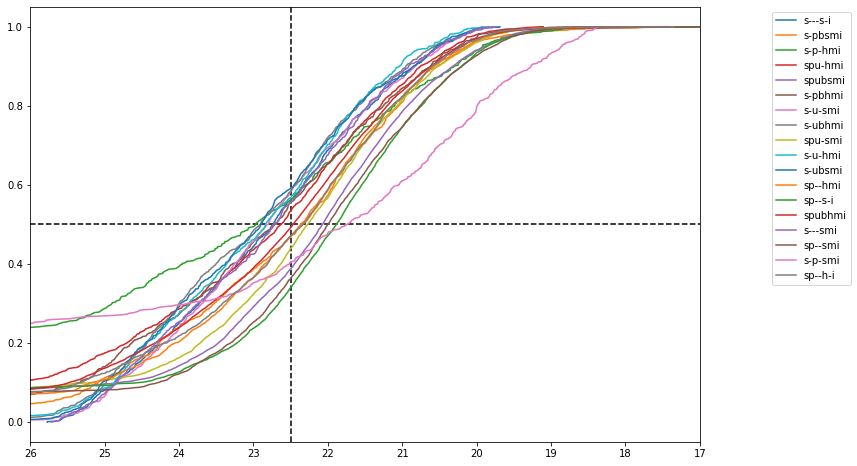

In [18]:
pl.figure(figsize=(12,8))
for geom in geoms:
    pars = augpars_dict[geom]
    f470 = f470s[geom]
    lum = pars['Model Luminosity']
    lumsel = (lum > 0.05) & (lum < 0.5)
    if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
        rslt = f470['TOTAL_FLUX'][lumsel, 5]
        print(rslt)
        rslt = rslt[np.isfinite(rslt)]
        rslt = np.sort(rslt)
        pl.plot((rslt / (8.5**2)).to(u.ABmag), np.arange(len(rslt)) / len(rslt), label=geom)
pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
pl.xlim(1e-5,5)
pl.axvline(22.5, linestyle='--', color='k', zorder=-50)
pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
pl.xlim(26, 17);
#pl.semilogx();

18.739813532572736 20.14778607034496 26.264743371696156


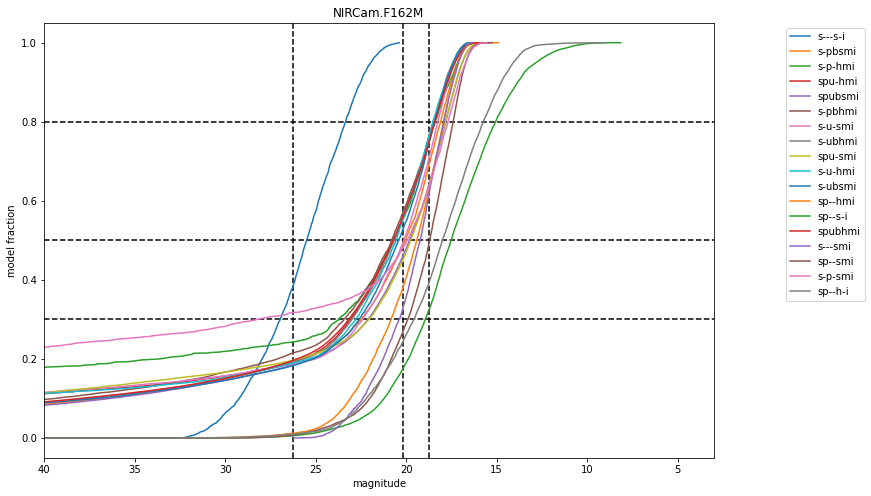

17.376526421812038 18.81107990921727 25.104701342216536


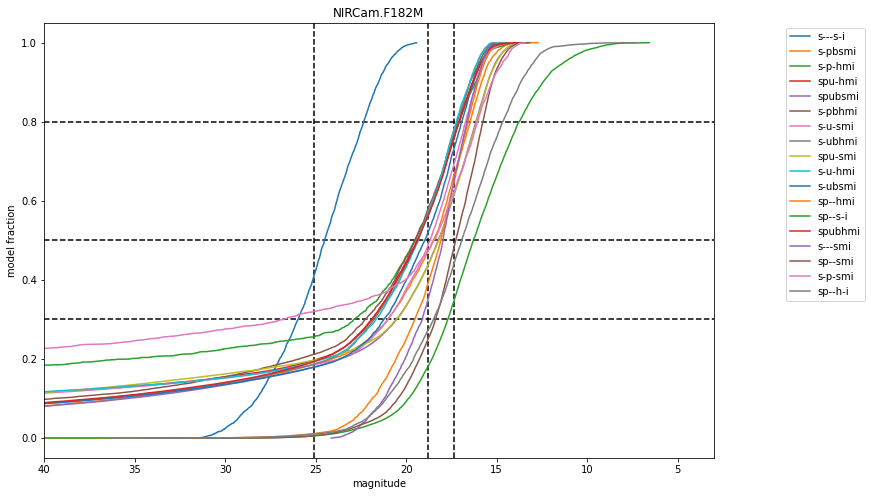

17.124161412316052 18.54983983335494 24.727592635356654


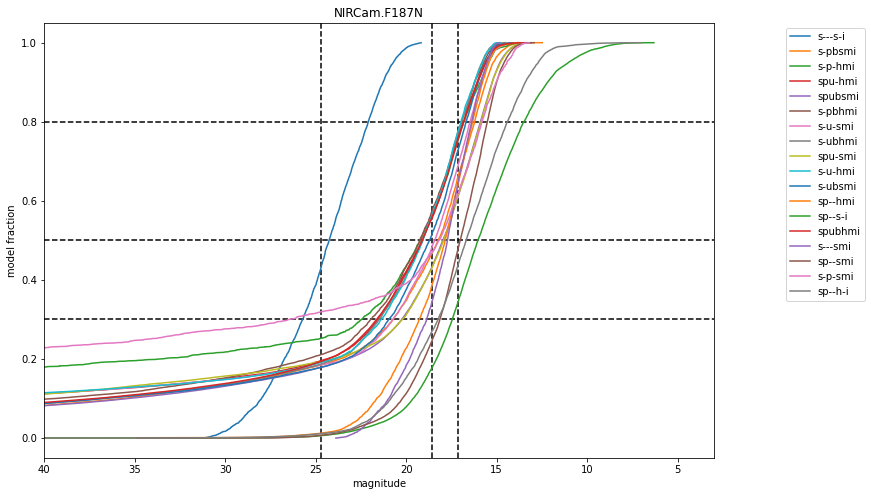

16.108318074558785 17.59139558096365 23.82454310166898


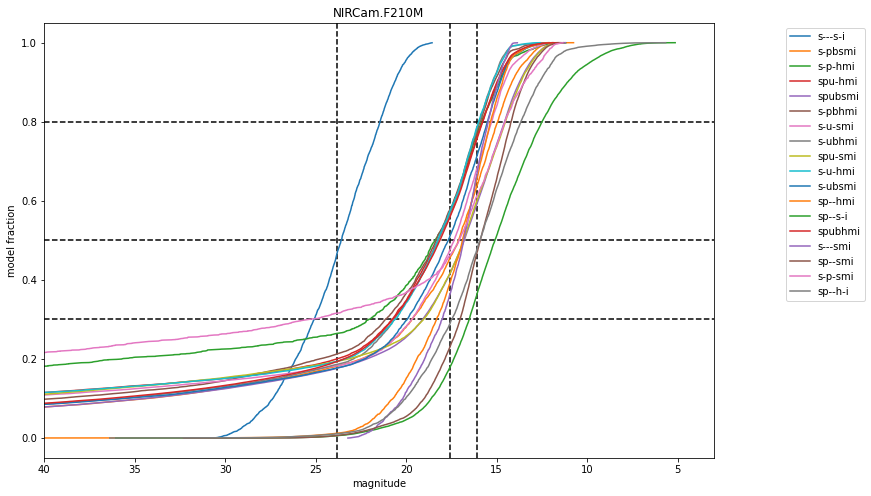

13.259094508192339 14.927834685814279 20.67292500155741


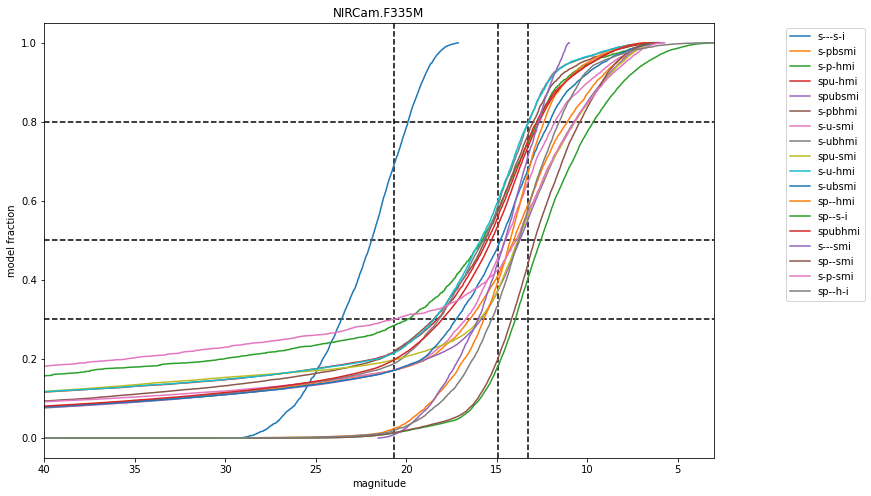

12.925672487044988 14.61299079816217 20.29756913308389


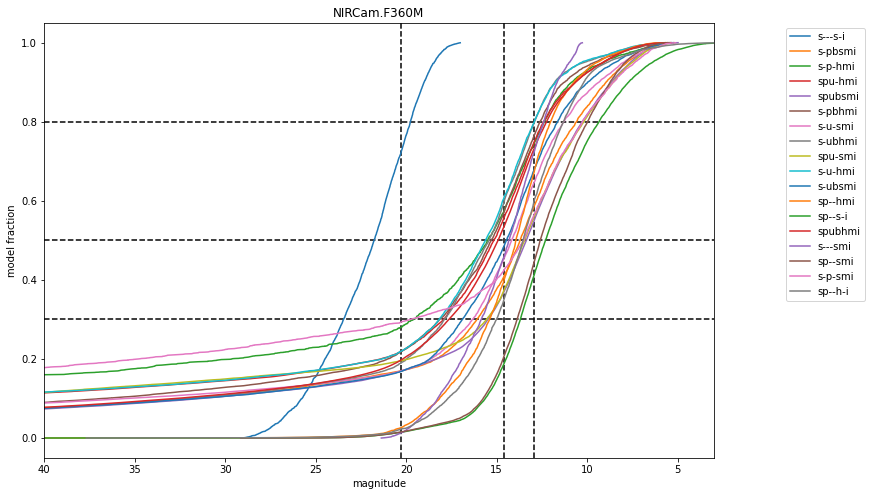

12.423419108839596 14.138580484134998 19.475833518998357


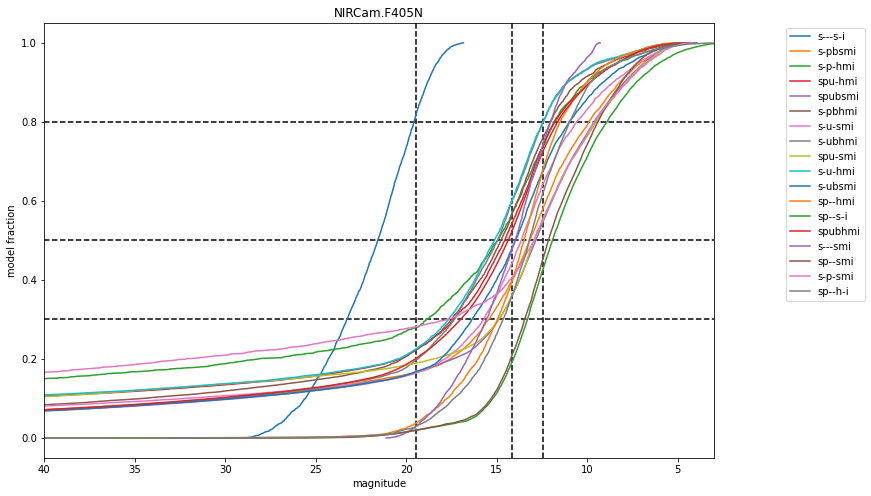

12.424599962221196 14.152753362737165 19.60691875459456


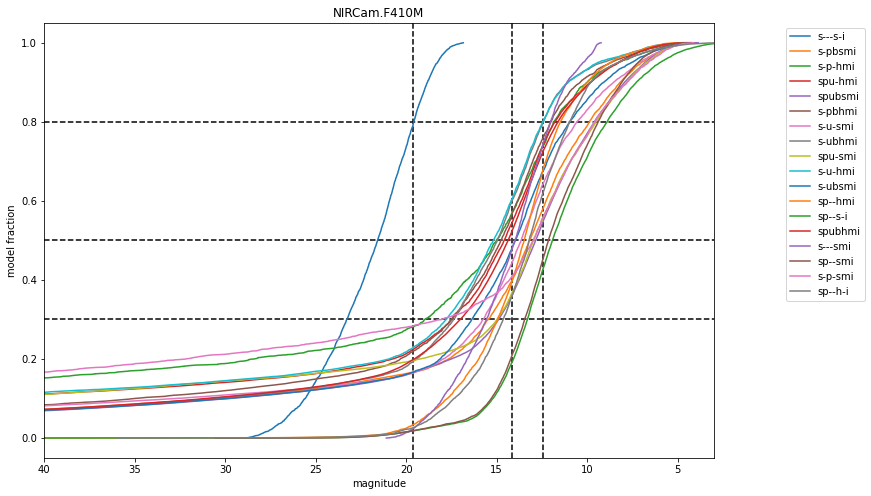

11.835151572271005 13.61884427106782 18.652571564823095


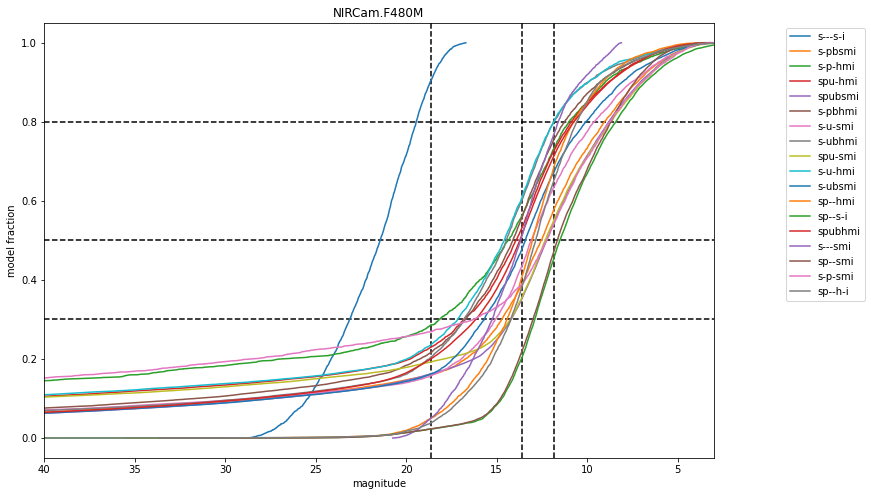

11.29233555688349 13.15232291480132 17.834325474066507


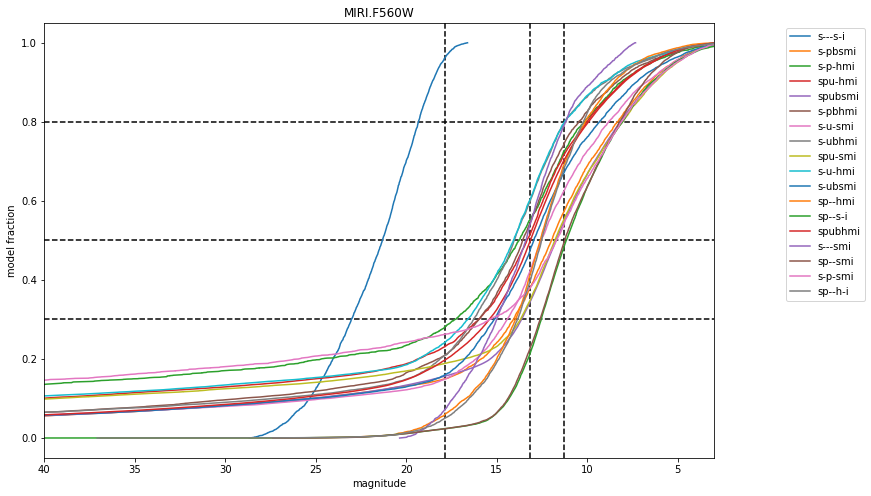

10.194932780320103 12.202608912693673 16.217077443318626


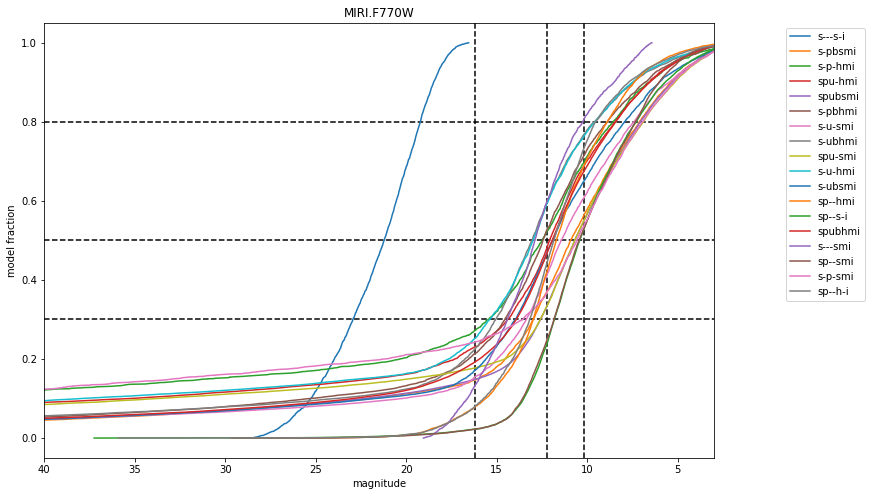

11.090460323271468 13.26681426301998 18.242674313838677


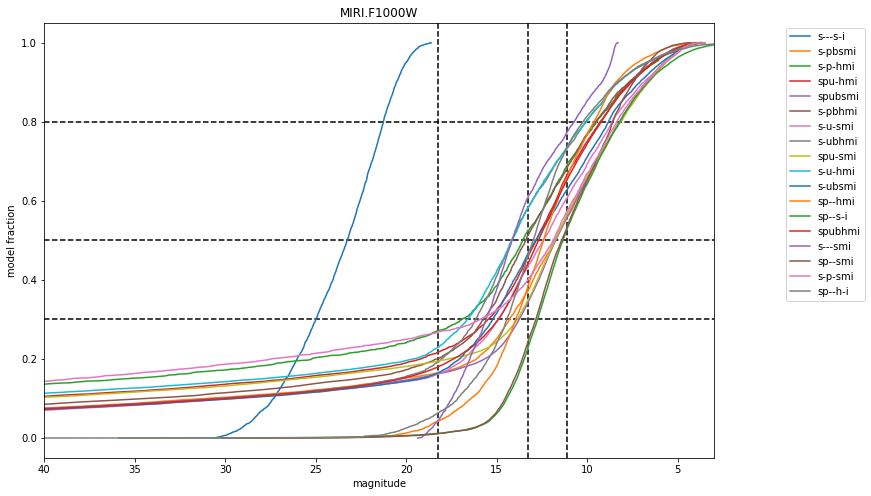

8.657125449693472 10.66037109716283 13.725366753002454


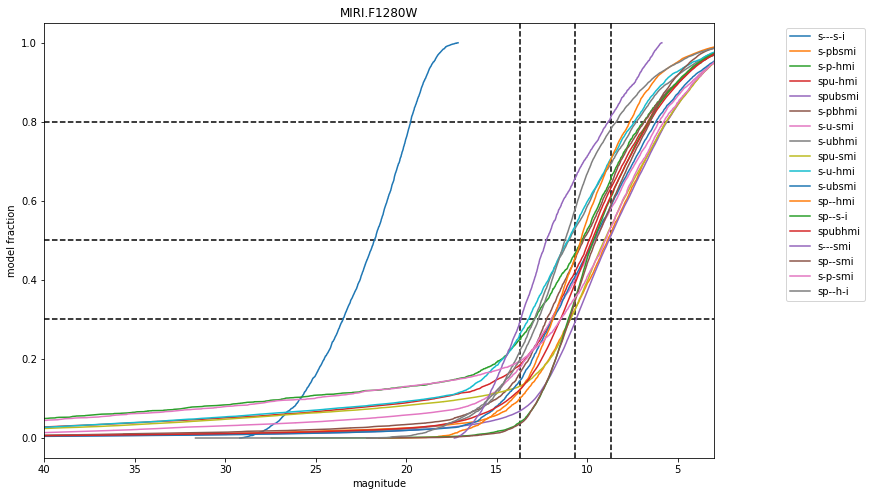

7.480213706008025 9.2522786325973 12.319194871781589


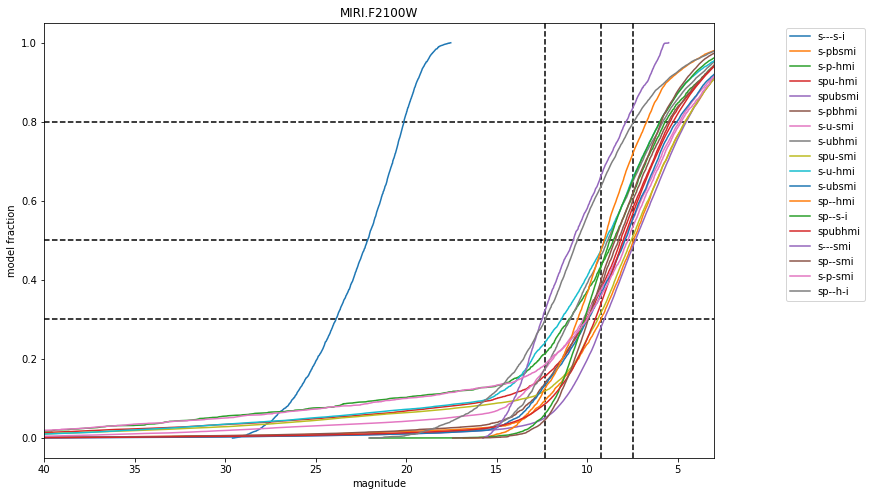

[18.739813532572736, 17.376526421812038, 17.124161412316052, 16.108318074558785, 13.259094508192339, 12.925672487044988, 12.423419108839596, 12.424599962221196, 11.835151572271005, 11.29233555688349, 10.194932780320103, 11.090460323271468, 8.657125449693472, 7.480213706008025] [20.14778607034496, 18.81107990921727, 18.54983983335494, 17.59139558096365, 14.927834685814279, 14.61299079816217, 14.138580484134998, 14.152753362737165, 13.61884427106782, 13.15232291480132, 12.202608912693673, 13.26681426301998, 10.66037109716283, 9.2522786325973] [26.264743371696156, 25.104701342216536, 24.727592635356654, 23.82454310166898, 20.67292500155741, 20.29756913308389, 19.475833518998357, 19.60691875459456, 18.652571564823095, 17.834325474066507, 16.217077443318626, 18.242674313838677, 13.725366753002454, 12.319194871781589] [1.62, 1.82, 1.87, 2.1, 3.35, 3.6, 4.05, 4.1, 4.8, 5.6, 7.7, 10.0, 12.8, 21.0]


In [19]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg, D22_MWAvg,CT06_MWLoc
from dust_extinction.parameter_averages import CCM89
ext = CT06_MWLoc()

bandlist = ['NIRCam.F162M', 'NIRCam.F182M', 'NIRCam.F187N', 'NIRCam.F210M', 'NIRCam.F335M', 'NIRCam.F360M', 'NIRCam.F405N',
            'NIRCam.F410M', 'NIRCam.F480M', 'MIRI.F560W', 'MIRI.F770W', 'MIRI.F1000W', 'MIRI.F1280W', 'MIRI.F2100W']
av=30
distance_modulus = 5 * np.log10(540)
mags_30 = [] ; mags_50 = [] ; mags_80 = []
wls = []
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
for band in bandlist:            
    
        
        
    fig = pl.figure(figsize=(12,8))
    
    wl_um = int(band[-4:-1])*u.um/100
    if band == 'MIRI.F1000W' or band== 'MIRI.F1280W' or band=='MIRI.F2100W':
        wl_um = int(band[-5:-1])*u.um/100
    mag_30 = [] ; mag_50 = [] ; mag_80 = [] 
    for geom in geoms:

        geomtab = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+23_models-1.1/{geom}/convolved/JWST/{band}.fits')
         for geom in geoms}
        geomtab1 = geomtab[geom]
        
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = lum>100

    
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        #lumsel = (lum > 0.05) & (lum < 0.5)
        lumsel = lum>100
        if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = geomtab1['TOTAL_FLUX'][lumsel, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            mag = -2.5*np.log10(rslt / u.Quantity(jfilts.loc['JWST/'+band]['ZeroPoint'], u.Jy)) +  av * ext(wl_um) + distance_modulus
            pl.plot(mag, np.arange(len(rslt)) / len(rslt), label=geom)
            mag_30.append(np.percentile(mag,30))
            mag_50.append(np.percentile(mag,50))
            mag_80.append(np.percentile(mag,80))
    mags_30.append(np.mean(mag_30))
    mags_50.append(np.mean(mag_50))
    mags_80.append(np.mean(mag_80))
    print(np.mean(mag_30), np.mean(mag_50), np.mean(mag_80))
    wls.append(wl_um.value)
    pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
    pl.axvline(np.mean(mag_30), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.3, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_50), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_80), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.8, linestyle='--', color='k', zorder=-50)
    pl.xlim(40, 3)
    pl.ylabel('model fraction')
    pl.xlabel('magnitude')
    pl.title(f'{band}')
    pl.show()
    pl.close()
print(mags_30,mags_50,mags_80,wls)

KeyboardInterrupt: 

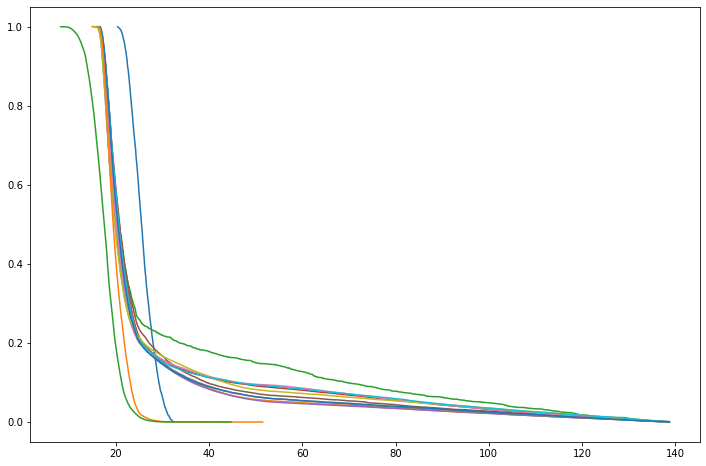

In [21]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg, D22_MWAvg,CT06_MWLoc
from dust_extinction.parameter_averages import CCM89
ext = CT06_MWLoc()

bandlist = ['NIRCam.F162M', 'NIRCam.F182M', 'NIRCam.F187N', 'NIRCam.F210M', 'NIRCam.F335M', 'NIRCam.F360M', 'NIRCam.F405N',
            'NIRCam.F410M', 'NIRCam.F480M', 'MIRI.F560W', 'MIRI.F770W', 'MIRI.F1000W', 'MIRI.F1280W', 'MIRI.F2100W']
av=30
distance_modulus = 5 * np.log10(540)
mags_30 = [] ; mags_50 = [] ; mags_80 = []
wls = []
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
for band in bandlist:            
    
        
        
    fig = pl.figure(figsize=(12,8))
    
    wl_um = int(band[-4:-1])*u.um/100
    if band == 'MIRI.F1000W' or band== 'MIRI.F1280W' or band=='MIRI.F2100W':
        wl_um = int(band[-5:-1])*u.um/100
    mag_30 = [] ; mag_50 = [] ; mag_80 = [] 
    for geom in geoms:

        geomtab = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+23_models-1.1/{geom}/convolved/JWST/{band}.fits')
         for geom in geoms}
        geomtab1 = geomtab[geom]
        
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = lum>100

    
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        #lumsel = (lum > 0.05) & (lum < 0.5)
        lumsel = lum>100
        if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = geomtab1['TOTAL_FLUX'][lumsel, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            mag = -2.5*np.log10(rslt / u.Quantity(jfilts.loc['JWST/'+band]['ZeroPoint'], u.Jy)) +  av * ext(wl_um) + distance_modulus
            pl.plot(mag, np.arange(len(rslt)) / len(rslt), label=geom)
            mag_30.append(np.percentile(mag,30))
            mag_50.append(np.percentile(mag,50))
            mag_80.append(np.percentile(mag,80))
    mags_30.append(np.mean(mag_30))
    mags_50.append(np.mean(mag_50))
    mags_80.append(np.mean(mag_80))
    print(np.mean(mag_30), np.mean(mag_50), np.mean(mag_80))
    wls.append(wl_um.value)
    pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
    pl.axvline(np.mean(mag_30), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.3, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_50), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_80), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.8, linestyle='--', color='k', zorder=-50)
    pl.xlim(40, 3)
    pl.ylabel('model fraction')
    pl.xlabel('magnitude')
    pl.title(f'{band}')
    pl.show()
    pl.close()
print(mags_30,mags_50,mags_80,wls)

In [ ]:
np.logspace(2,6,20)

In [ ]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg, D22_MWAvg,CT06_MWLoc
from dust_extinction.parameter_averages import CCM89
ext = CT06_MWLoc()

bandlist = ['NIRCam.F162M', 'NIRCam.F182M', 'NIRCam.F187N', 'NIRCam.F210M', 'NIRCam.F335M', 'NIRCam.F360M', 'NIRCam.F405N',
            'NIRCam.F410M', 'NIRCam.F480M', 'MIRI.F560W', 'MIRI.F770W', 'MIRI.F1000W', 'MIRI.F1280W', 'MIRI.F2100W']
av=30
distance_modulus = 5 * np.log10(540)
mags_30 = [] ; mags_50 = [] ; mags_80 = []
wls = []
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
for band in bandlist:            
    
        
        
    fig = pl.figure(figsize=(12,8))
    
    wl_um = int(band[-4:-1])*u.um/100
    if band == 'MIRI.F1000W' or band== 'MIRI.F1280W' or band=='MIRI.F2100W':
        wl_um = int(band[-5:-1])*u.um/100
    mag_30 = [] ; mag_50 = [] ; mag_80 = [] 
    for geom in geoms:

        geomtab = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+23_models-1.1/{geom}/convolved/JWST/{band}.fits')
         for geom in geoms}
        geomtab1 = geomtab[geom]
        
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = lum>100

    
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        #lumsel = (lum > 0.05) & (lum < 0.5)
        #lumsel = lum>100
        if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = geomtab1['TOTAL_FLUX'][:, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            mag = -2.5*np.log10(rslt / u.Quantity(jfilts.loc['JWST/'+band]['ZeroPoint'], u.Jy)) +  av * ext(wl_um) + distance_modulus
            pl.plot(mag, np.arange(len(rslt)) / len(rslt), label=geom)
            mag_30.append(np.percentile(mag,30))
            mag_50.append(np.percentile(mag,50))
            mag_80.append(np.percentile(mag,80))
    mags_30.append(np.mean(mag_30))
    mags_50.append(np.mean(mag_50))
    mags_80.append(np.mean(mag_80))
    print(np.mean(mag_30), np.mean(mag_50), np.mean(mag_80))
    wls.append(wl_um.value)
    pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
    pl.axvline(np.mean(mag_30), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.3, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_50), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_80), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.8, linestyle='--', color='k', zorder=-50)
    pl.xlim(40, 3)
    pl.ylabel('model fraction')
    pl.xlabel('magnitude')
    pl.title(f'{band}')
    pl.show()
    pl.close()
print(mags_30,mags_50,mags_80,wls)

0.22998289654852222 16.068604542149437 1048.8605373806429


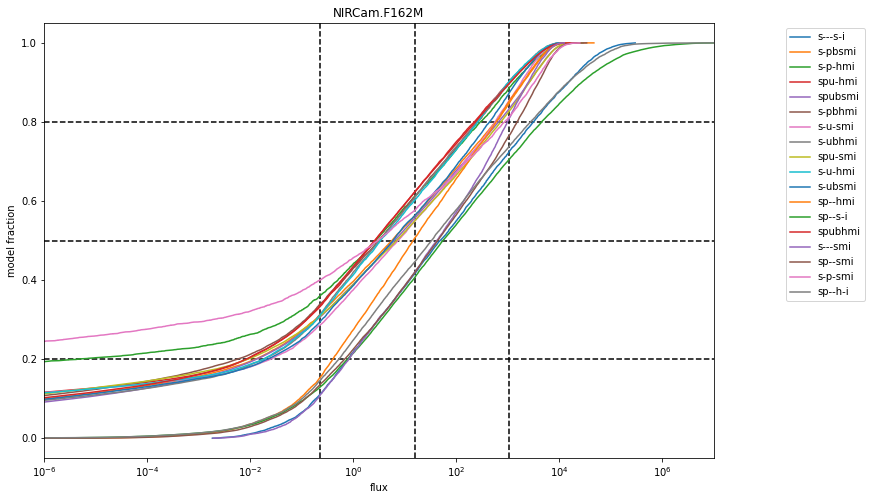

0.19753814733655956 14.911216855049133 1082.3665852864588


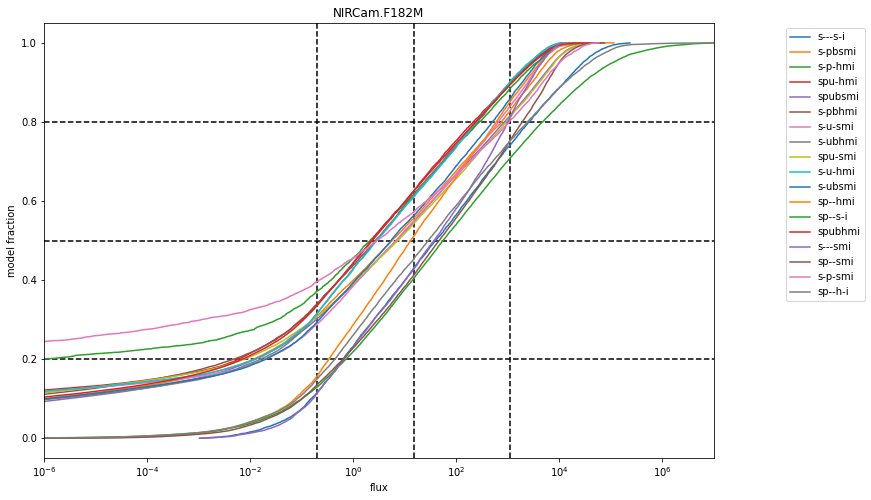

0.19439164296403572 14.733687811427647 1072.3836864895302


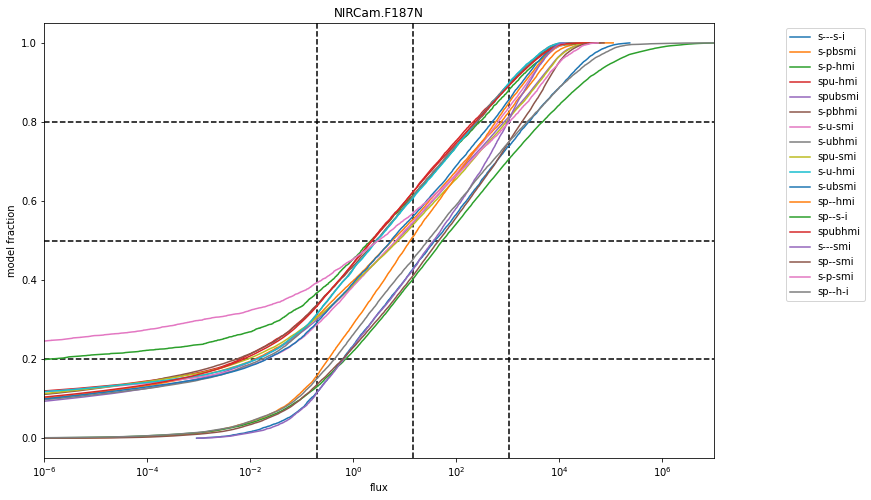

0.1756010261590151 14.431511024634043 1138.7355656941736


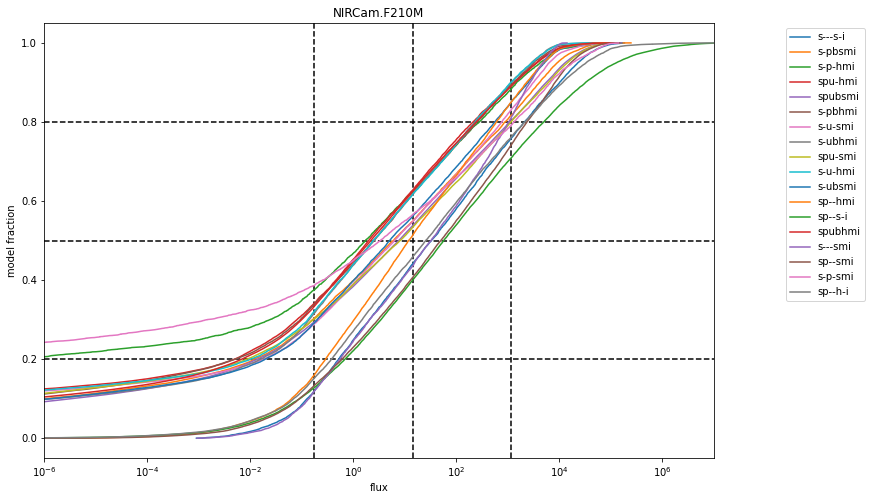

0.12247175062848169 13.524992691146004 1405.5798792521182


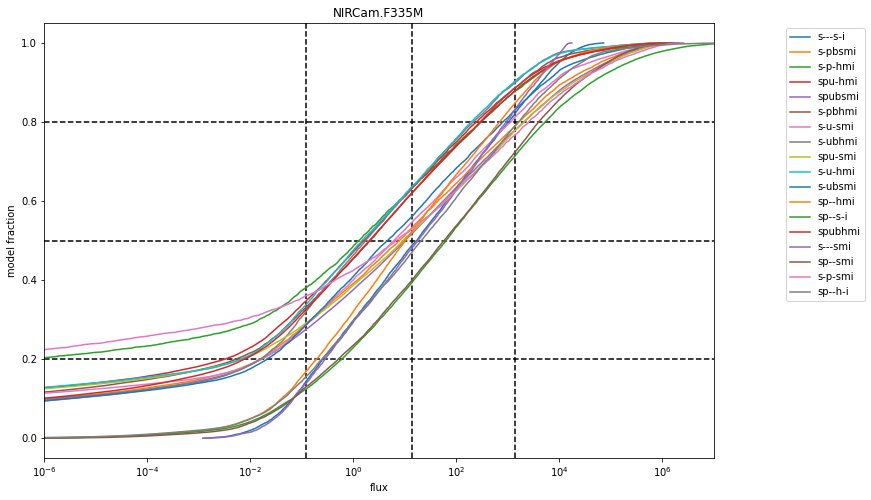

0.11769559730718414 13.615577389796576 1458.7731682671454


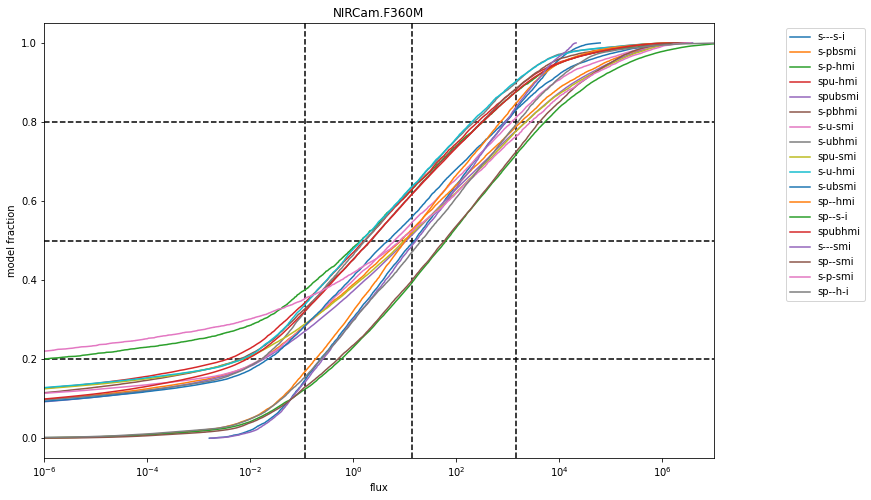

0.10825581481805464 13.618435776895947 1521.295917934842


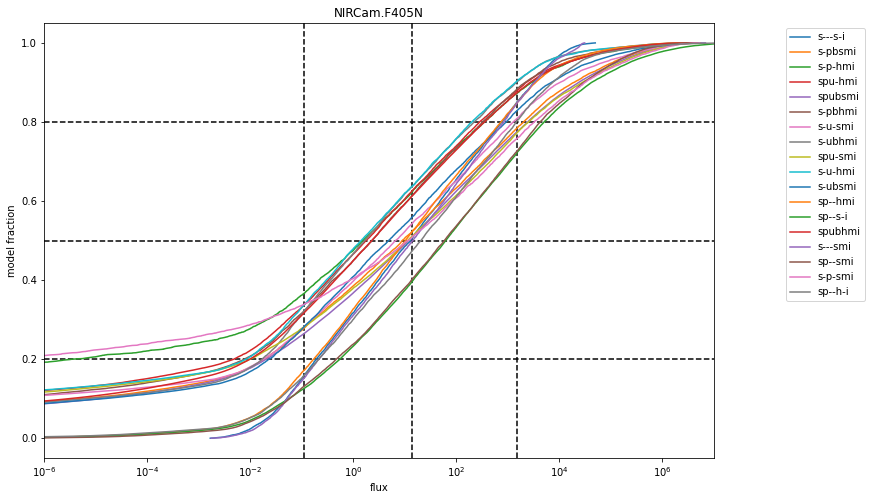

0.10651524422173257 13.363789088196224 1496.3190597534199


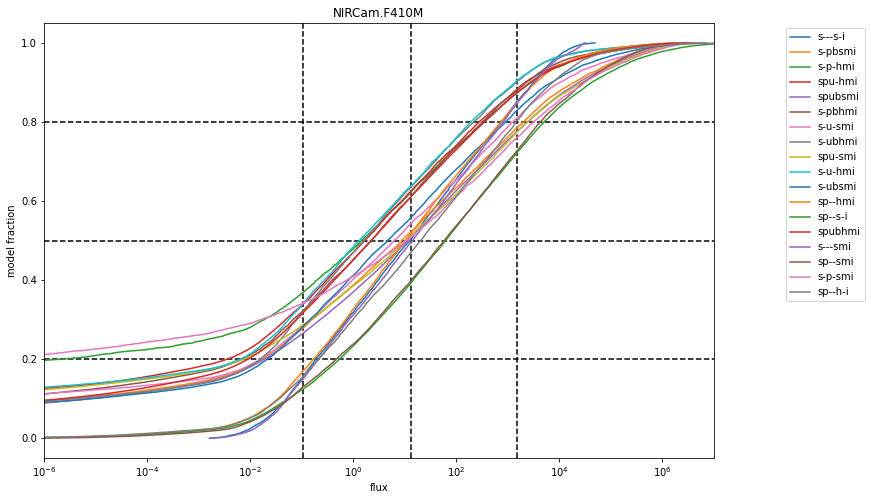

0.09033634699232558 12.9087789522277 1548.4771943834103


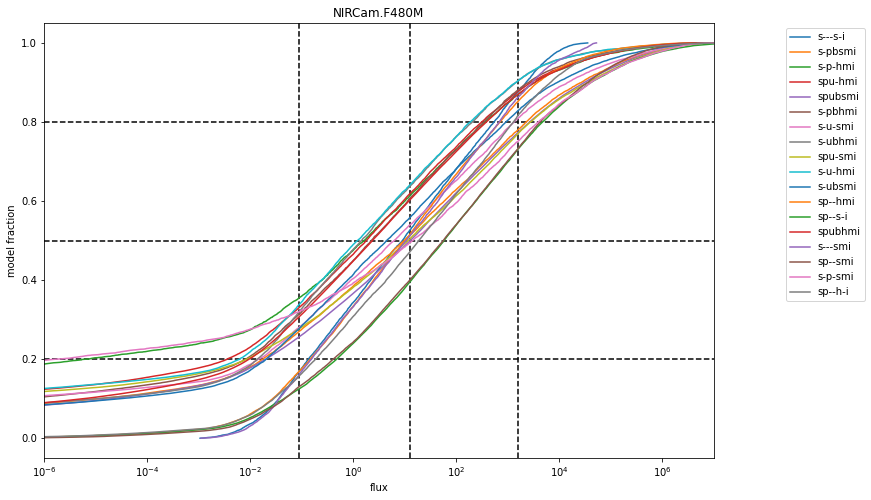

0.08310430777154226 12.890899307197994 1614.4022762722464


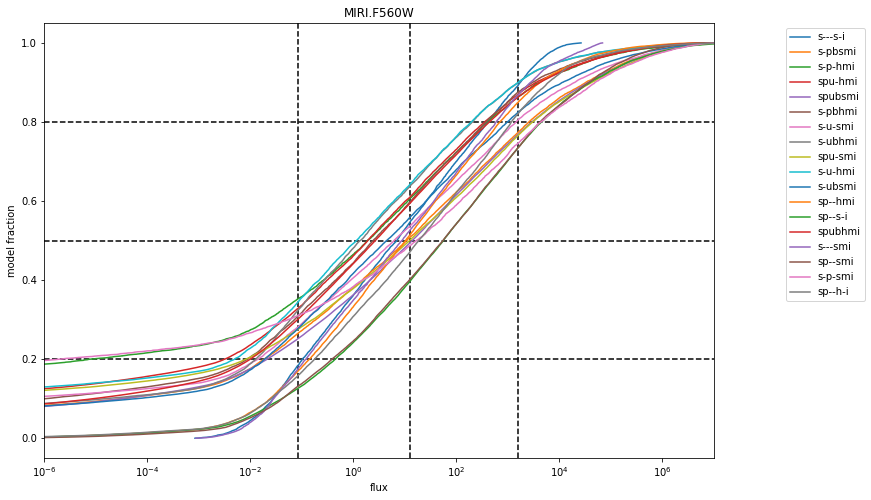

0.08207847825291946 15.087497115135193 2068.763441128203


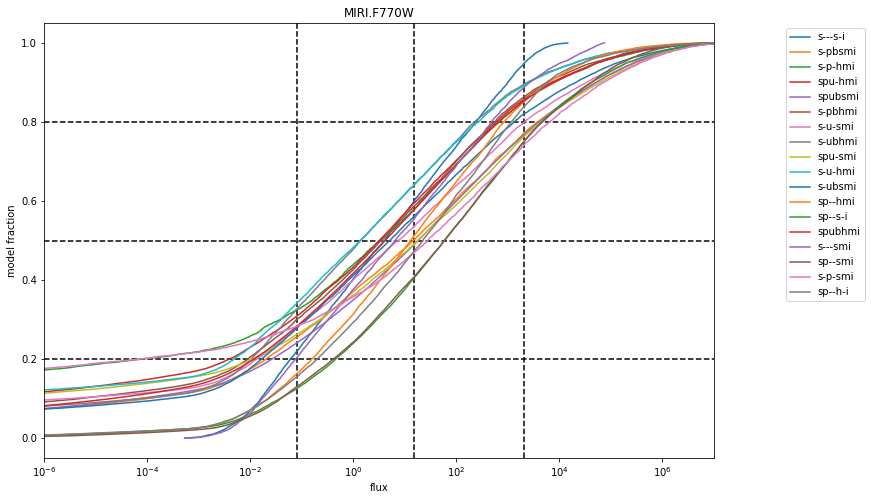

0.11409355815982408 21.36418409811126 3132.786713494197


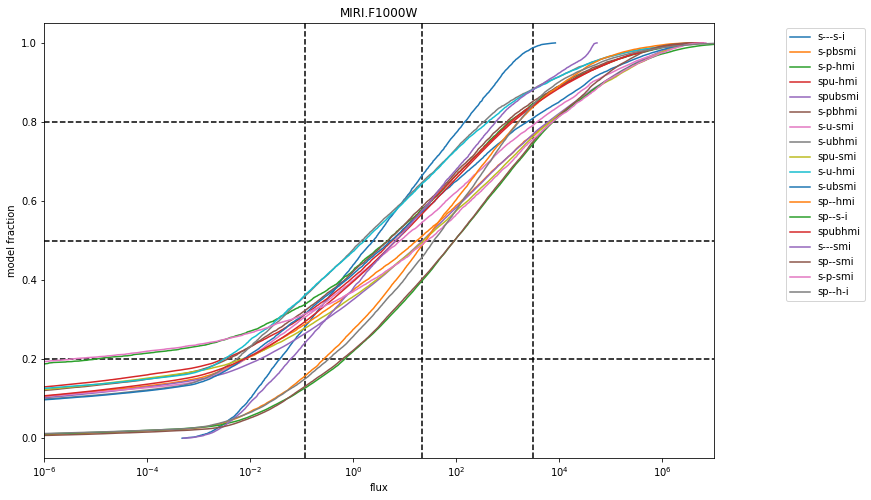

0.16347951427516008 35.568281941943695 4927.150957489019


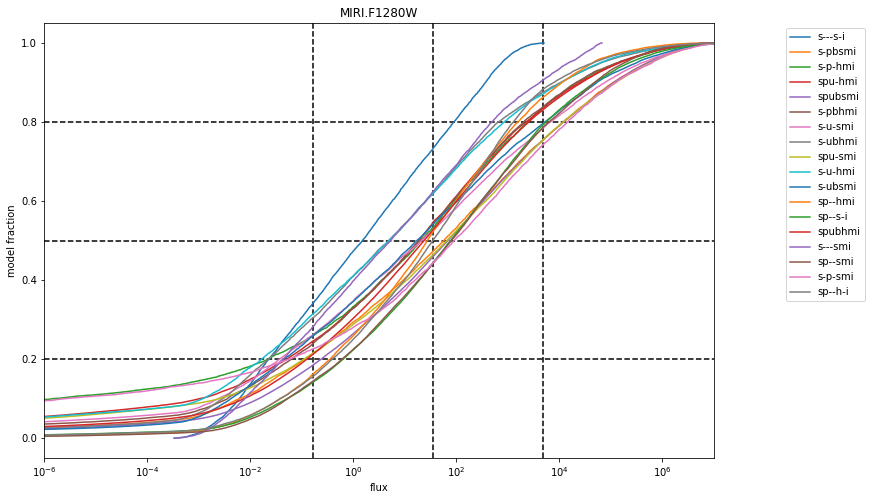

0.3790364316871597 81.19500210384528 8800.959096611874


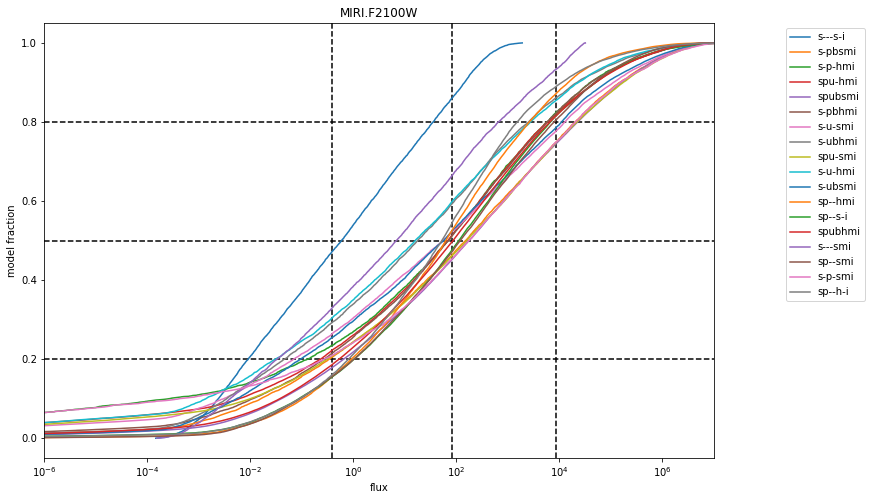

[0.22998289654852222, 0.19753814733655956, 0.19439164296403572, 0.1756010261590151, 0.12247175062848169, 0.11769559730718414, 0.10825581481805464, 0.10651524422173257, 0.09033634699232558, 0.08310430777154226, 0.08207847825291946, 0.11409355815982408, 0.16347951427516008, 0.3790364316871597] [16.068604542149437, 14.911216855049133, 14.733687811427647, 14.431511024634043, 13.524992691146004, 13.615577389796576, 13.618435776895947, 13.363789088196224, 12.9087789522277, 12.890899307197994, 15.087497115135193, 21.36418409811126, 35.568281941943695, 81.19500210384528] [1048.8605373806429, 1082.3665852864588, 1072.3836864895302, 1138.7355656941736, 1405.5798792521182, 1458.7731682671454, 1521.295917934842, 1496.3190597534199, 1548.4771943834103, 1614.4022762722464, 2068.763441128203, 3132.786713494197, 4927.150957489019, 8800.959096611874] [1.62, 1.82, 1.87, 2.1, 3.35, 3.6, 4.05, 4.1, 4.8, 5.6, 7.7, 10.0, 12.8, 21.0]


In [23]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg, D22_MWAvg,CT06_MWLoc
from dust_extinction.parameter_averages import CCM89
ext = CT06_MWLoc()

bandlist = ['NIRCam.F162M', 'NIRCam.F182M', 'NIRCam.F187N', 'NIRCam.F210M', 'NIRCam.F335M', 'NIRCam.F360M', 'NIRCam.F405N',
            'NIRCam.F410M', 'NIRCam.F480M', 'MIRI.F560W', 'MIRI.F770W', 'MIRI.F1000W', 'MIRI.F1280W', 'MIRI.F2100W']
av=30
distance_modulus = 5 * np.log10(540)
mags_30 = [] ; mags_50 = [] ; mags_80 = []
wls = []
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
for band in bandlist:            
    
        
        
    fig = pl.figure(figsize=(12,8))
    
    wl_um = int(band[-4:-1])*u.um/100
    if band == 'MIRI.F1000W' or band== 'MIRI.F1280W' or band=='MIRI.F2100W':
        wl_um = int(band[-5:-1])*u.um/100
    mag_30 = [] ; mag_50 = [] ; mag_80 = [] 
    for geom in geoms:

        geomtab = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+23_models-1.1/{geom}/convolved/JWST/{band}.fits')
         for geom in geoms}
        geomtab1 = geomtab[geom]
        
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = lum>100

    
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        #lumsel = (lum > 0.05) & (lum < 0.5)
        #lumsel = lum>100
        if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = geomtab1['TOTAL_FLUX'][:, 4]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            #mag = -2.5*np.log10(rslt / u.Quantity(jfilts.loc['JWST/'+band]['ZeroPoint'], u.Jy)) +  av * ext(wl_um) + distance_modulus
            mag = rslt
            pl.plot(mag, np.arange(len(rslt)) / len(rslt), label=geom)
            mag_30.append(np.percentile(mag,20))
            mag_50.append(np.percentile(mag,50))
            mag_80.append(np.percentile(mag,80))
    mags_30.append(np.mean(mag_30))
    mags_50.append(np.mean(mag_50))
    mags_80.append(np.mean(mag_80))
    print(np.mean(mag_30), np.mean(mag_50), np.mean(mag_80))
    wls.append(wl_um.value)
    pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
    pl.axvline(np.mean(mag_30), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.2, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_50), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_80), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.8, linestyle='--', color='k', zorder=-50)
    pl.xlim(1e-6, 1e7)
    pl.xscale('log')
    pl.ylabel('model fraction')
    pl.xlabel('flux')
    pl.title(f'{band}')
    
    pl.show()
    pl.close()
np.savetxt('yso_alllum_20.dat',np.vstack((wls,mags_30)).T, delimiter=' ', newline='\n')
np.savetxt('yso_alllum_50.dat',np.vstack((wls,mags_50)).T, delimiter=' ', newline='\n')
np.savetxt('yso_alllum_80.dat',np.vstack((wls,mags_80)).T, delimiter=' ', newline='\n')

print(mags_30,mags_50,mags_80,wls)

77.26680510882917 908.5876659817166 6541.761938476565


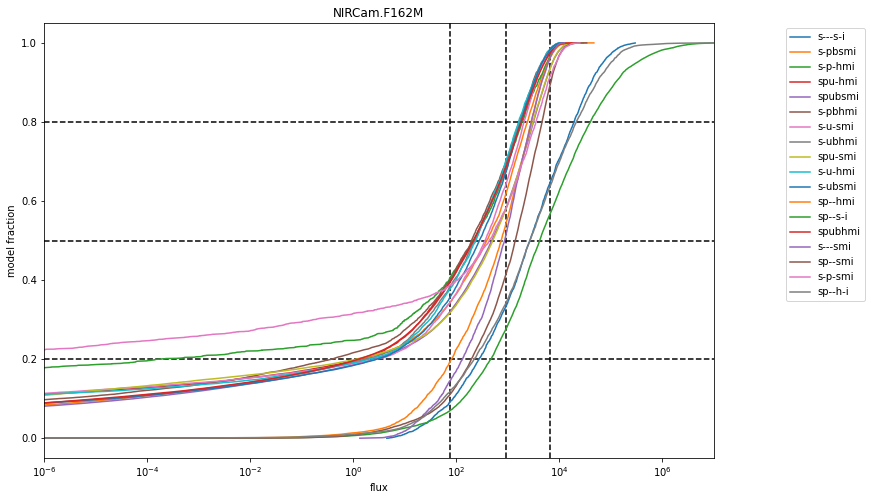

80.30964177538173 940.0672967698839 7085.266601562503


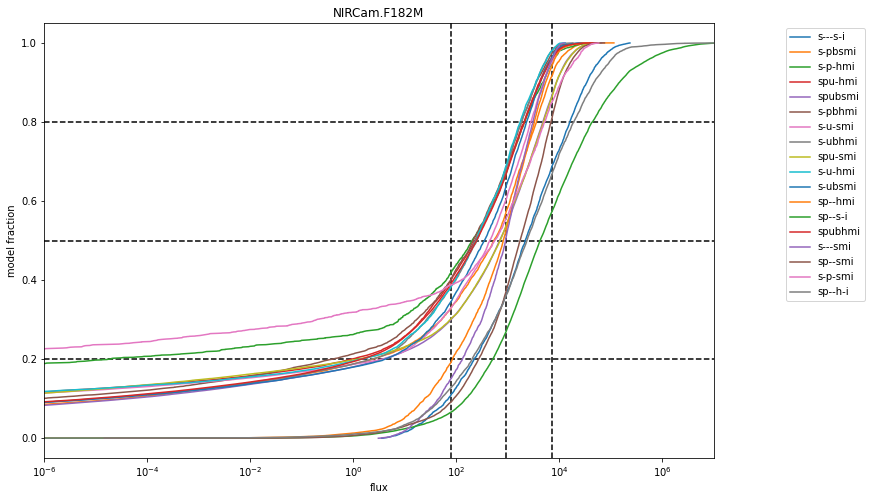

79.98961265006801 933.1843486362034 7032.965882703996


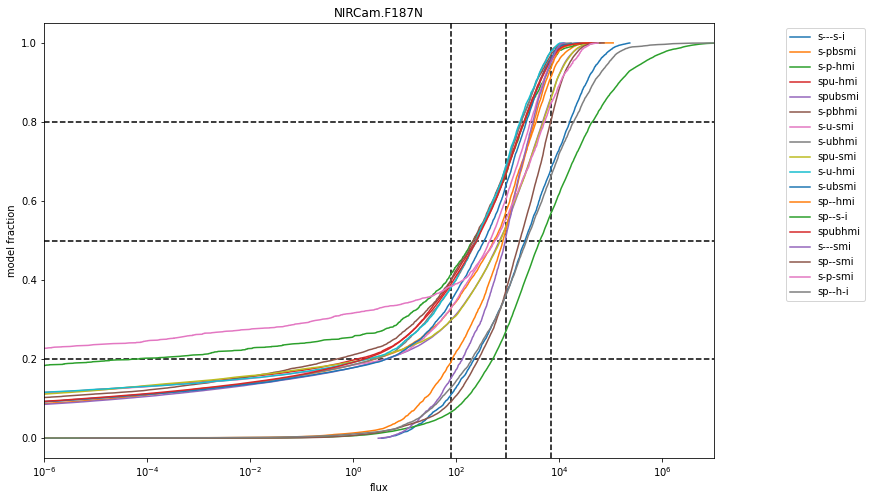

83.55227777869653 996.1884858873156 8001.346577962243


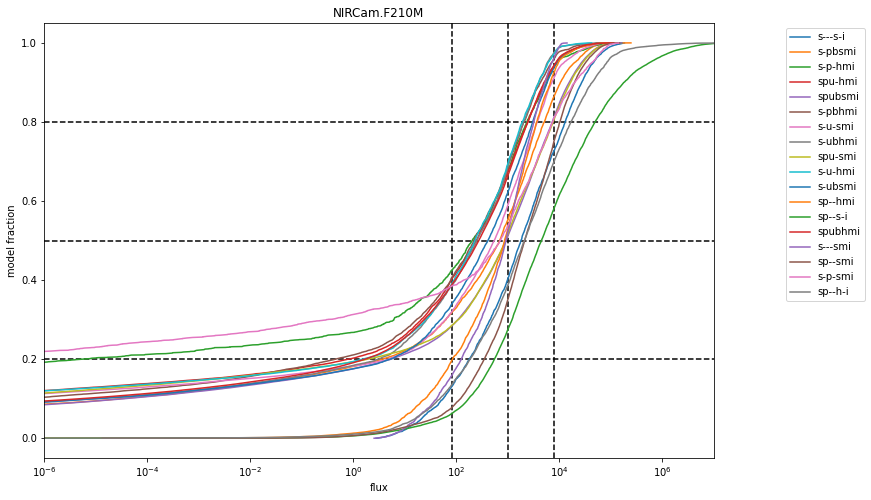

92.26102202208553 1201.4657791985405 15114.973581271712


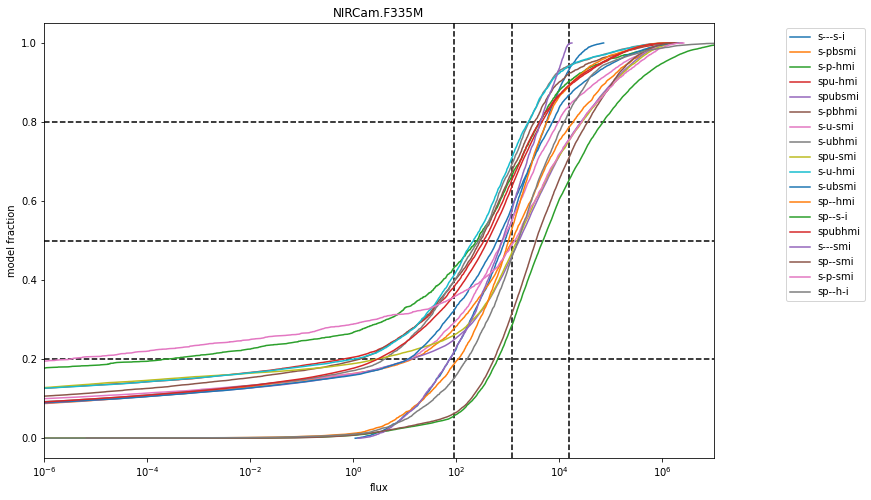

92.71350262123657 1237.6872151692708 16723.367816840295


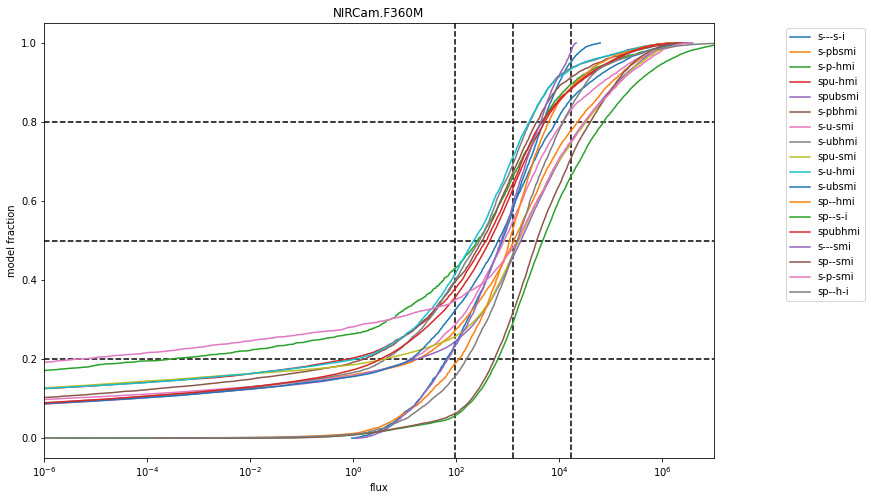

93.22053097964665 1284.3227305942112 19260.83097059463


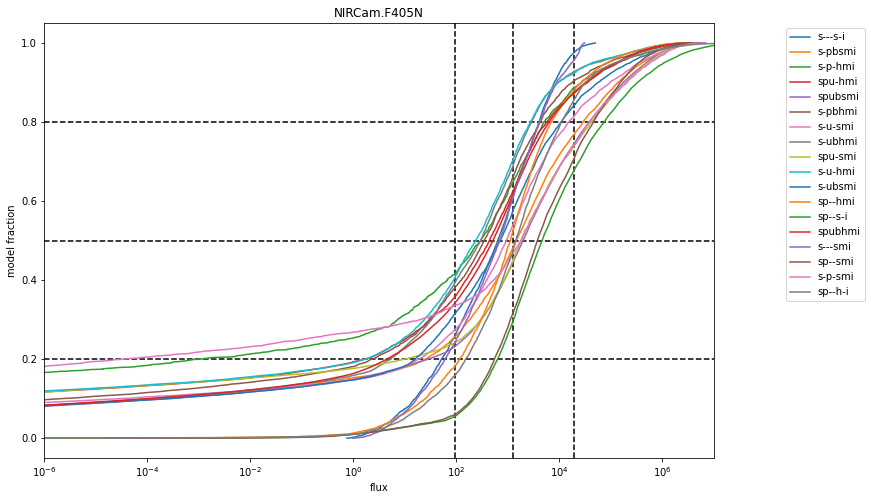

92.2834358392518 1266.9841571384006 19264.647856987856


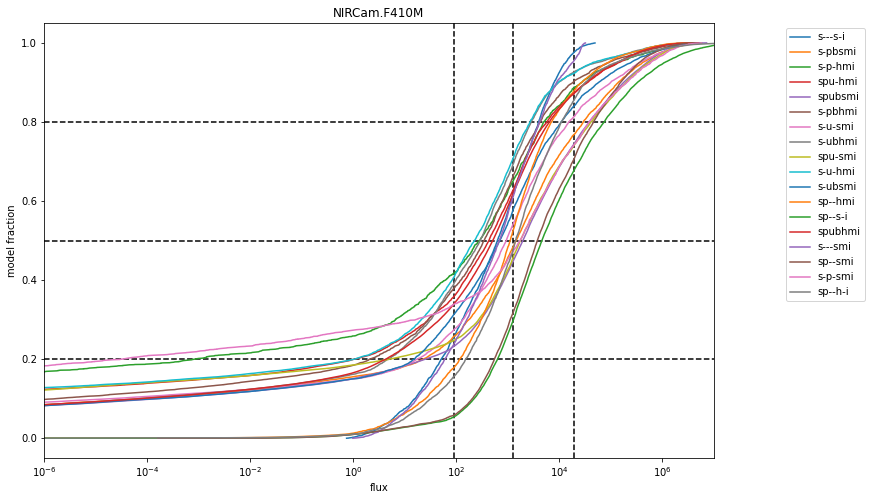

91.67396954247639 1299.8752899169922 23285.362291124155


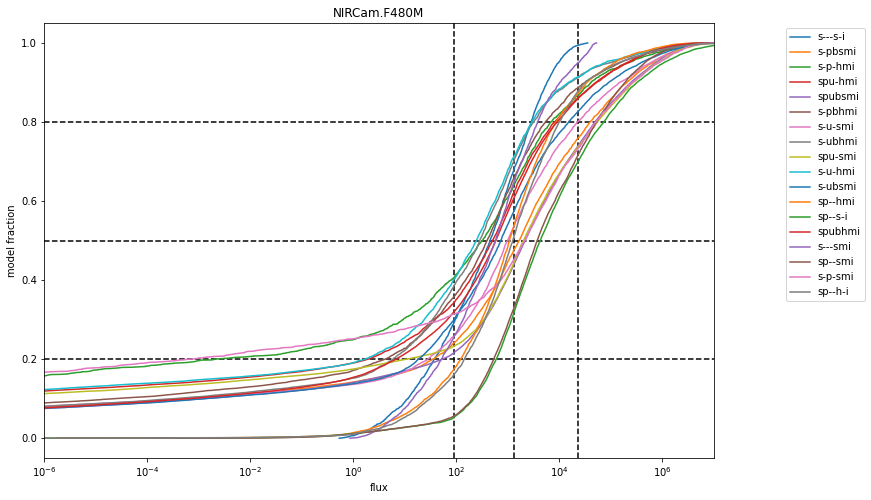

93.42236946773355 1350.212141248915 27338.041007486998


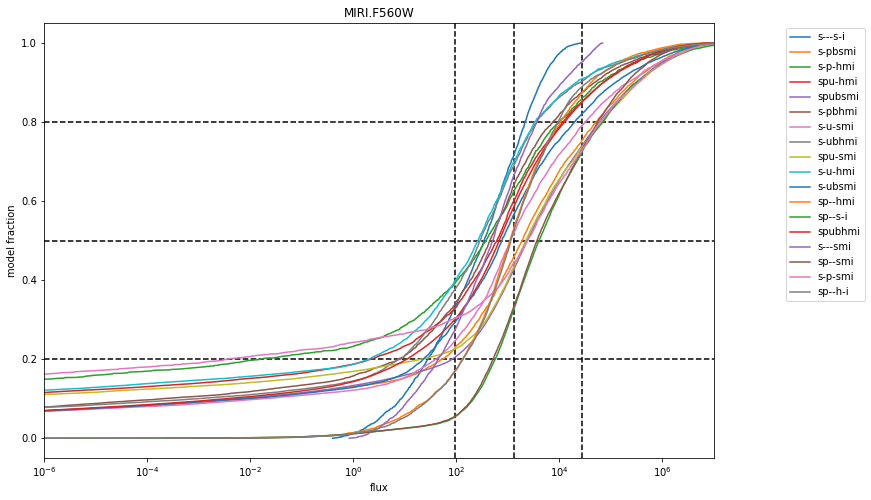

112.79176934791938 1687.4168099297417 39336.13427870012


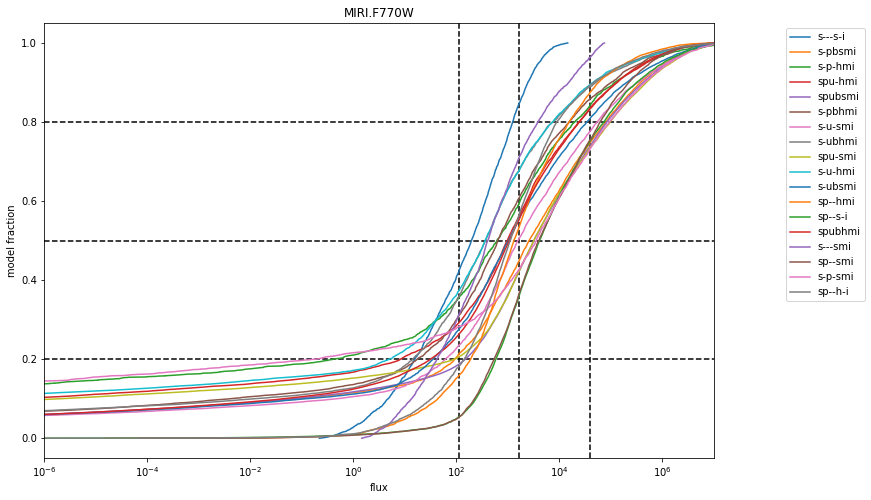

150.3639930535884 2548.524982876248 54271.523561604874


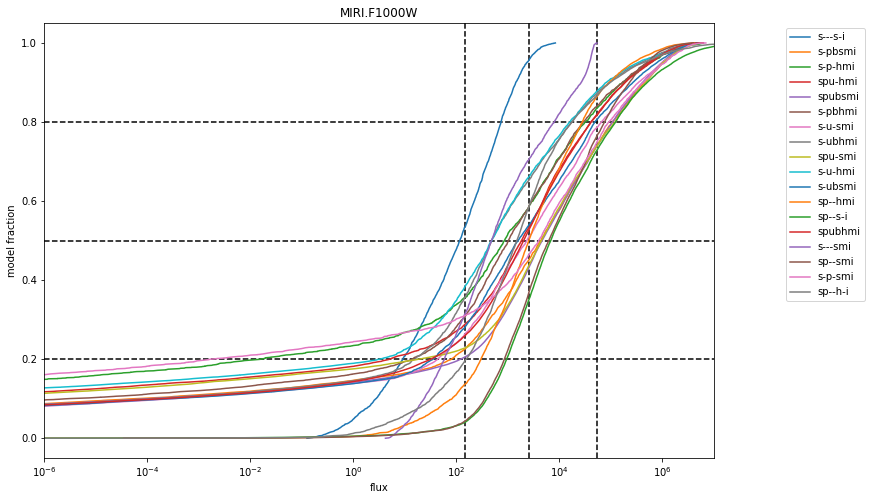

298.0343827989367 4280.622460259332 77783.94438273115


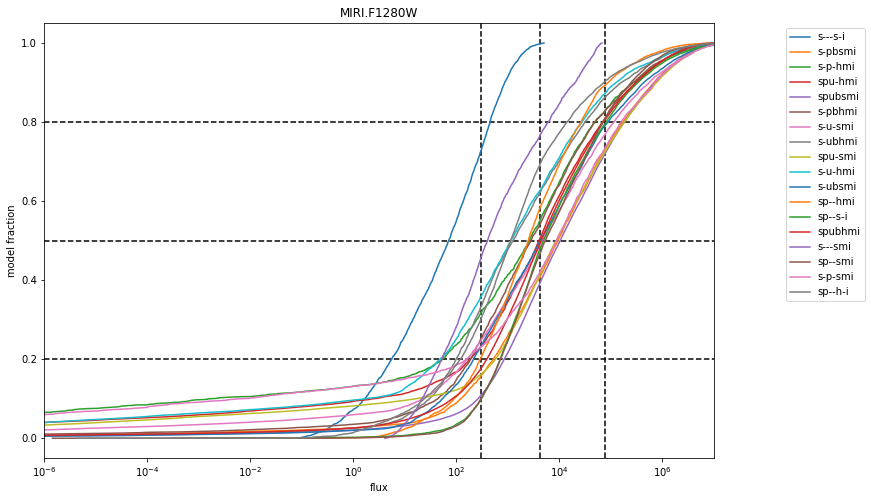

566.8828799777561 8013.465578291151 106045.61625400126


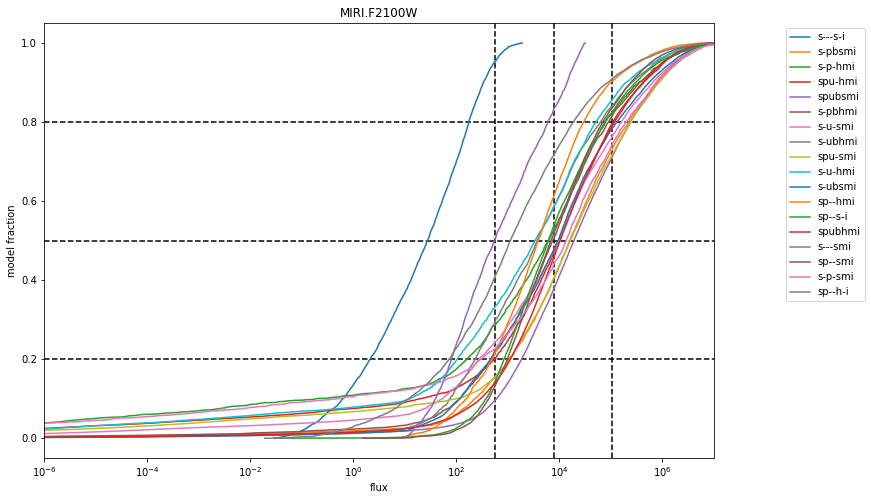

[77.26680510882917, 80.30964177538173, 79.98961265006801, 83.55227777869653, 92.26102202208553, 92.71350262123657, 93.22053097964665, 92.2834358392518, 91.67396954247639, 93.42236946773355, 112.79176934791938, 150.3639930535884, 298.0343827989367, 566.8828799777561] [908.5876659817166, 940.0672967698839, 933.1843486362034, 996.1884858873156, 1201.4657791985405, 1237.6872151692708, 1284.3227305942112, 1266.9841571384006, 1299.8752899169922, 1350.212141248915, 1687.4168099297417, 2548.524982876248, 4280.622460259332, 8013.465578291151] [6541.761938476565, 7085.266601562503, 7032.965882703996, 8001.346577962243, 15114.973581271712, 16723.367816840295, 19260.83097059463, 19264.647856987856, 23285.362291124155, 27338.041007486998, 39336.13427870012, 54271.523561604874, 77783.94438273115, 106045.61625400126] [1.62, 1.82, 1.87, 2.1, 3.35, 3.6, 4.05, 4.1, 4.8, 5.6, 7.7, 10.0, 12.8, 21.0]


In [22]:
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg, D22_MWAvg,CT06_MWLoc
from dust_extinction.parameter_averages import CCM89
ext = CT06_MWLoc()

bandlist = ['NIRCam.F162M', 'NIRCam.F182M', 'NIRCam.F187N', 'NIRCam.F210M', 'NIRCam.F335M', 'NIRCam.F360M', 'NIRCam.F405N',
            'NIRCam.F410M', 'NIRCam.F480M', 'MIRI.F560W', 'MIRI.F770W', 'MIRI.F1000W', 'MIRI.F1280W', 'MIRI.F2100W']
av=30
distance_modulus = 5 * np.log10(540)
mags_30 = [] ; mags_50 = [] ; mags_80 = []
wls = []
geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/r+24_models-1.2/*/')
         if x.split("/")[-2].startswith('s')]
for band in bandlist:            
    
        
        
    fig = pl.figure(figsize=(12,8))
    
    wl_um = int(band[-4:-1])*u.um/100
    if band == 'MIRI.F1000W' or band== 'MIRI.F1280W' or band=='MIRI.F2100W':
        wl_um = int(band[-5:-1])*u.um/100
    mag_30 = [] ; mag_50 = [] ; mag_80 = [] 
    for geom in geoms:

        geomtab = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/r+23_models-1.1/{geom}/convolved/JWST/{band}.fits')
         for geom in geoms}
        geomtab1 = geomtab[geom]
        
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = lum>100

    
        pars = augpars_dict[geom]
        lum = pars['Model Luminosity']
        lumsel = (lum > 0.05) & (lum < 0.5)
        lumsel = lum>100
        if any(lumsel):
        #pl.hist(f470['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = geomtab1['TOTAL_FLUX'][lumsel, 4]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            #mag = -2.5*np.log10(rslt / u.Quantity(jfilts.loc['JWST/'+band]['ZeroPoint'], u.Jy)) +  av * ext(wl_um) + distance_modulus
            mag = rslt
            pl.plot(mag, np.arange(len(rslt)) / len(rslt), label=geom)
            mag_30.append(np.percentile(mag,20))
            mag_50.append(np.percentile(mag,50))
            mag_80.append(np.percentile(mag,80))
    mags_30.append(np.mean(mag_30))
    mags_50.append(np.mean(mag_50))
    mags_80.append(np.mean(mag_80))
    print(np.mean(mag_30), np.mean(mag_50), np.mean(mag_80))
    wls.append(wl_um.value)
    pl.legend(loc='upper left', bbox_to_anchor=(1.1,1))
    pl.axvline(np.mean(mag_30), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.2, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_50), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
    pl.axvline(np.mean(mag_80), linestyle='--', color='k', zorder=-50)
    pl.axhline(0.8, linestyle='--', color='k', zorder=-50)
    pl.xlim(1e-6, 1e7)
    pl.xscale('log')
    pl.ylabel('model fraction')
    pl.xlabel('flux')
    pl.title(f'{band}')
    
    pl.show()
    pl.close()
np.savetxt('yso_lum100_20.dat',np.vstack((wls,mags_30)).T, delimiter=' ', newline='\n')
np.savetxt('yso_lum100_50.dat',np.vstack((wls,mags_50)).T, delimiter=' ', newline='\n')
np.savetxt('yso_lum100_80.dat',np.vstack((wls,mags_80)).T, delimiter=' ', newline='\n')

print(mags_30,mags_50,mags_80,wls)

In [ ]:
pl.figure(figsize=(8,6), dpi=150)
data = []
for lumlo, lumhi in ([(0.005, 0.05), (0.05, 0.5), (0.5, 5), (5, 50), (50, 500)]):
    for geom in geoms:
        pars = augpars_dict[geom]
        f480 = f480s[geom]
        lum = pars['Model Luminosity']
        lumsel = (lum > lumlo) & (lum <= lumhi)
        if any(lumsel):
            #pl.hist(f480['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = f480['TOTAL_FLUX'][lumsel, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            data = np.hstack([data, rslt])
            #pl.plot(rslt / (8.5**2), np.arange(len(rslt)) / len(rslt), label=geom)
    data = np.sort(data)
    magdata = -2.5*np.log10((u.Quantity(data, u.mJy).to(u.Jy) / (8.5**2)) / u.Quantity(jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'], u.Jy))
    L, = pl.plot(magdata.value, np.arange(len(data)) / len(data))
    #print(np.median(magdata))
    medmag = np.median(magdata).value
    #print(medmag)
    pl.axvline(medmag, linestyle=':', zorder=-100, color=L.get_color(), label=f'{lumlo:0.1g} < L < {lumhi:0.1g}: $M_{{med}}={medmag:0.1f}$')
    #pl.axvline(22.5, linestyle='--', color='k', zorder=-50)
pl.legend(loc='best')# bbox_to_anchor=(1.1,1))
pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
pl.xlabel("[F480M] mag")
pl.ylabel("Fraction of Sources")
pl.xlim(25, 9);

In [ ]:
pl.figure(figsize=(8,6), dpi=150)
data = []
for lumlo, lumhi in ([(0.005, 0.05), (0.05, 0.5), (0.5, 5), (5, 50), (50, 500)]):
    for geom in geoms:
        pars = augpars_dict[geom]
        f212 = f212s[geom]
        lum = pars['Model Luminosity']
        lumsel = (lum > lumlo) & (lum <= lumhi)
        if any(lumsel):
            #pl.hist(f212['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = f212['TOTAL_FLUX'][lumsel, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            data = np.hstack([data, rslt])
            #pl.plot(rslt / (8.5**2), np.arange(len(rslt)) / len(rslt), label=geom)
    data = np.sort(data)
    magdata = -2.5*np.log10((u.Quantity(data, u.mJy).to(u.Jy) / (8.5**2)) / u.Quantity(jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'], u.Jy))
    L, = pl.plot(magdata.value, np.arange(len(data)) / len(data))
    #print(np.median(magdata))
    medmag = np.median(magdata).value
    #print(medmag)
    pl.axvline(medmag, linestyle=':', zorder=-100, color=L.get_color(), label=f'{lumlo:0.1g} < L < {lumhi:0.1g}: $M_{{med}}={medmag:0.1f}$')
    #pl.axvline(22.5, linestyle='--', color='k', zorder=-50)
pl.legend(loc='best')# bbox_to_anchor=(1.1,1))
pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
pl.xlabel("[F212N] mag")
pl.ylabel("Fraction of Sources")
pl.xlim(25, 9);

In [ ]:
v1[:5]

In [ ]:
v2[:5]

In [ ]:
pl.scatter(v1['TOTAL_FLUX'][:,5], v2['TOTAL_FLUX'][:,5])

In [ ]:
pl.hist(-2.5*np.log10(v2['TOTAL_FLUX'][:,5]/666000))

In [ ]:
%matplotlib inline
import pylab as pl

In [ ]:
from astropy.table import Table
from astropy.visualization import simple_norm

In [ ]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [ ]:
mist = Table.read(f'{basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist['410M405'] = mist['F410M']
mist['405M410'] = mist['F405N']

In [ ]:
distance_modulus = 5*np.log10(8500)-5
distance_modulus

In [ ]:
from astropy.visualization import simple_norm

In [ ]:
f212s['s---s-i'][:5]

In [ ]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F210M'][agesel] - mist['F480M'][agesel],
                   (mist['F210M'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )

        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

mag212 = (u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
mag480 = (u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
#pl.scatter(mag212-mag480, mag212, s=1, zorder=-10)

#pl.axhline(0, linestyle='--', color='k')
#pl.axvline(0, linestyle='--', color='k')
pl.xlabel("[F210M]-[F480M]")
pl.ylabel("[F210M]")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,3)
pl.xlim([-0.25, 0.5]);
#agesel.sum()

In [ ]:
distance_modulus

In [ ]:
#mag212b = -2.5*np.log10(tables[2.12*u.um]['TOTAL_FLUX'][sel, 0] / jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'])
#mag480b = -2.5*np.log10(tables[4.80*u.um]['TOTAL_FLUX'][sel, 0] / jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'])
mag212 = -2.5*np.log10((u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'], u.Jy))
mag480 = -2.5*np.log10((u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'], u.Jy))

In [ ]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F212N'][agesel] - mist['F480M'][agesel],
                   (mist['F212N'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )

        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

#mag212 = (u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
#mag480 = (u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
geom = 's---s-i'
mag212 = -2.5*np.log10((u.Quantity(f212s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'], u.Jy))
mag480 = -2.5*np.log10((u.Quantity(f480s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'], u.Jy))
pl.scatter(mag212-mag480, mag212, s=1, c=augpars_dict[geom]['star.temperature'], zorder=-10)

#pl.axhline(0, linestyle='--', color='k')
#pl.axvline(0, linestyle='--', color='k')
pl.xlabel("[F212N]-[F480M]")
pl.ylabel("[F212N]")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,3)
pl.xlim([-0.5, 1.5]);
#agesel.sum()

In [ ]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7,8):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F212N'][agesel] - mist['F480M'][agesel],
                   (mist['F212N'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )

        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

#mag212 = (u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
#mag480 = (u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
geom = 'spubhmi'
mag212 = -2.5*np.log10((u.Quantity(f212s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'], u.Jy))
mag480 = -2.5*np.log10((u.Quantity(f480s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'], u.Jy))
pl.scatter(mag212-mag480, mag212, s=1,
           c=np.log10(augpars_dict[geom]['Model Luminosity']),
           alpha=0.01, zorder=-10)
pl.title(geom)
cb2 = pl.colorbar()
cb2.set_label("log YSO Luminosity")
cb2.set_alpha(1)
cb2.draw_all()

#pl.axhline(0, linestyle='--', color='k')
#pl.axvline(0, linestyle='--', color='k')
pl.xlabel("[F212N]-[F480M]")
pl.ylabel("[F212N]")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(26,3)
pl.xlim([-0.75, 3.5]);
#agesel.sum()

In [ ]:
for geom in augpars_dict:
    pl.figure(dpi=150)

    norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
    for age in np.unique(mist['log10_isochrone_age_yr']):
        if age in (5,6,7,8):

            agesel = mist['log10_isochrone_age_yr'] == age
            pl.scatter(mist['F212N'][agesel] - mist['F480M'][agesel],
                       (mist['F212N'])[agesel]+distance_modulus,
                       c=mist['initial_mass'][agesel],
                       norm=norm,
                       cmap='inferno',
                       alpha=0.5,
                       s=1,
                      )


    cb = pl.colorbar()
    cb.set_ticks([0.5,1,5,10,50,250])
    cb.set_label("Mass")

    #mag212 = (u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
    #mag480 = (u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
    mag212 = -2.5*np.log10((u.Quantity(f212s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F212N']['ZeroPoint'], u.Jy))
    mag480 = -2.5*np.log10((u.Quantity(f480s[geom]['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2) / u.Quantity(jfilts.loc['JWST/NIRCam.F480M']['ZeroPoint'], u.Jy))
    pl.scatter(mag212-mag480, mag212, s=1,
               c=np.log10(augpars_dict[geom]['Model Luminosity']),
               alpha=0.01, zorder=-10)
    #pl.title(geom)
    cb2 = pl.colorbar()
    cb2.set_label("log YSO Luminosity")
    cb2.set_alpha(1)
    cb2.draw_all()

    #pl.axhline(0, linestyle='--', color='k')
    #pl.axvline(0, linestyle='--', color='k')
    pl.xlabel("[F212N]-[F480M]")
    pl.ylabel("[F212N]")
    #pl.axis([-0.2,0.1,-0.1,0.3])
    pl.ylim(26,3)
    pl.xlim([-0.75, 3.5]);
    #agesel.sum()
    pl.savefig(f"JWST_F212NF480M_CMD_{geom}.png", bbox_inches='tight')

In [ ]:
mist['log_L'].max()

In [ ]:
mag212 = (u.Quantity(f212s['spubsmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
mag480 = (u.Quantity(f480s['spubsmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
pl.scatter(mag212-mag480, mag212, s=1, alpha=0.1)
pl.axis([-5,5,20,0])

In [ ]:
mag212 = (u.Quantity(f212s['spubhmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
mag480 = (u.Quantity(f480s['spubhmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
pl.scatter(mag212-mag480, mag212, s=1, alpha=0.1)
pl.axis([-5,5,20,0])

In [ ]:
5 * np.log10(8.5)

In [ ]:
(f212s['s---s-i']['TOTAL_FLUX'].quantity).to(u.ABmag)[:,5].min().value + 5 * np.log10(8.5)

In [ ]:
(f212s['s---s-i']['TOTAL_FLUX'].quantity).to(u.ABmag)[:,5].min().value - 5

In [ ]:
(-2.5*np.log10(f212s['s---s-i']['TOTAL_FLUX'].quantity/(666*u.Jy))).min() - 5

In [ ]:
augpars_dict['s---s-i']

In [ ]:
augpars_dict['s---s-i']['star.temperature']

In [ ]:
pl.semilogx(augpars_dict['s---s-i']['Model Luminosity'], (-2.5*np.log10(f212s['s---s-i']['TOTAL_FLUX'][:,5].quantity/(666*u.Jy))),
           )
           #c=np.array(augpars_dict['s---s-i']['star.temperature'], dtype='float'))


In [ ]:
mag212 = (u.Quantity(f212s['spubhmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
mag480 = (u.Quantity(f480s['spubhmi']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
pl.scatter(mag212-mag480, mag212, s=1, alpha=0.1)
pl.axis([-5,5,20,0])

In [ ]:
mag212 = (u.Quantity(f212s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
mag480 = (u.Quantity(f480s['s---s-i']['TOTAL_FLUX'][:,5], u.mJy) / 8.5**2).to(u.ABmag)
pl.scatter(mag212-mag480, mag212, s=1, alpha=0.1)
pl.axis([-5,5,20,0])

In [ ]:
augpars_dict['spubsmi']

In [ ]:
pl.figure(figsize=(8,6), dpi=150)
data = []
for lumlo, lumhi in ([(0.05, 0.5), (0.5, 5), (5, 50), (50, 500), (500, 5000), (5e3, 5e4), (5e4, 5e5), (5e5, 5e6), (5e6, 5e7)]):
    for geom in geoms:
        pars = augpars_dict[geom]
        f212 = f212s[geom]
        lum = pars['Model Luminosity']
        lumsel = (lum > lumlo) & (lum <= lumhi)
        if any(lumsel):
            #pl.hist(f212['TOTAL_FLUX'][lumsel, 5], bins=np.geomspace(0.01, 10), label=geom)
            rslt = f212['TOTAL_FLUX'][lumsel, 5]
            rslt = rslt[np.isfinite(rslt)]
            rslt = np.sort(rslt)
            data = np.hstack([data, rslt])
            #pl.plot(rslt / (8.5**2), np.arange(len(rslt)) / len(rslt), label=geom)
    data = np.sort(data)
    magdata = (u.Quantity(data, u.mJy) / (8.5**2)).to(u.ABmag)
    L, = pl.plot(magdata.value, np.arange(len(data)) / len(data))
    #print(np.median(magdata))
    medmag = np.median(magdata).value
    #print(medmag)
    pl.axvline(medmag, linestyle=':', zorder=-100, color=L.get_color(), label=f'{lumlo:0.1g} < L < {lumhi:0.1g}: $M_{{med}}={medmag:0.1f}$')
    #pl.axvline(22.5, linestyle='--', color='k', zorder=-50)
pl.legend(loc='best')# bbox_to_anchor=(1.1,1))
pl.axhline(0.5, linestyle='--', color='k', zorder=-50)
pl.xlabel("[F212N] mag")
pl.ylabel("Fraction of Sources")
pl.xlim(26, 4);

In [ ]:

fig = pl.figure(figsize=(10, 10), dpi=150)

combos = [(colors_N[ii-1], colors_N[jj-1]) for ii,jj in ((2,3), (2,4), (1,5), (2,3),) ]
gridspec = sqgrid.get_grid(len(combos));

xarr = np.linspace(1, 5, 10000)*u.um
rawspec = np.ones(xarr.size, dtype=float)*u.Jy
av = 30


for ii, (color1, color2) in enumerate(combos):
    ax = fig.add_subplot(gridspec[ii])
    for geom, cmap in zip(('spubsmi', 'sp--smi',), ('viridis', 'inferno')):
        Lgt1 = augpars_dict[geom]['Model Luminosity'] > 1
        tbs = {cname: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/{geom}/convolved/JWST/{cname}.fits')
               for cname in color1 + color2}
        keys1 = [col for col in color1]
        keys2 = [col for col in color2]
        colorp1 = -2.5*np.log10(tbs[keys1[0]]['TOTAL_FLUX'][:, 5]) + 2.5*np.log10(tbs[keys1[1]]['TOTAL_FLUX'][:, 5])
        colorp2 = -2.5*np.log10(tbs[keys2[0]]['TOTAL_FLUX'][:, 5]) + 2.5*np.log10(tbs[keys2[1]]['TOTAL_FLUX'][:, 5])
        sc = ax.scatter(colorp1[Lgt1], colorp2[Lgt1], s=2, alpha=0.1,
                        c=np.log10(augpars_dict[geom]['Model Luminosity'])[Lgt1],
                        norm=simple_norm(np.log10(augpars_dict[geom]['Model Luminosity'])[Lgt1], stretch='linear',
                                      min_cut=0, max_cut=5),
                        cmap=cmap
                       )#(np.log10(augpars['Model Luminosity'])))
    #ax.scatter(colorp1[sel], colorp2[sel], s=5, alpha=0.5, c='r')
    ax.set_xlabel(f"{color1[0]} - {color1[1]}")
    ax.set_ylabel(f"{color2[0]} - {color2[1]}")
    ax.axis((-2,5,-2,5))
    cb = pl.colorbar(mappable=sc, ax=ax)
    cb.set_label('log Luminosity')
    wl1_um = int(color1[0][-4:-1])*u.um/100
    wl2_um = int(color1[1][-4:-1])*u.um/100
    wl3_um = int(color2[0][-4:-1])*u.um/100
    wl4_um = int(color2[1][-4:-1])*u.um/100
    extcol1 = av * (ext(wl1_um) - ext(wl2_um))
    extcol2 = av * (ext(wl3_um) - ext(wl4_um))

    for molecule, column, ccc in zip(('co', 'h2o', 'co2'),
                                      # normalized to a_v=30 in fig7 of boogert / Tb 2 of boogert
                             (1e-5 * av * 1e21, 4e-5 * av * 1e21, 1.3e-5*av*1e21),
                             ('orange', 'purple', 'red')):
        moldata = molecule_data[molecule]
        consts = load_molecule(molecule)
        spec = absorbed_spectrum(column*u.cm**-2, consts,
                                 molecular_weight=moldata['molwt'],
                                 spectrum=rawspec,
                                 xarr=xarr,
                                )
        flxd = fluxes_in_filters(xarr, spec)
        flxd_raw = fluxes_in_filters(xarr, rawspec)
        icecolor1 = flxd['JWST/'+color1[0]].to(u.ABmag).value - flxd['JWST/'+color1[1]].to(u.ABmag).value
        icecolor2 = flxd['JWST/'+color2[0]].to(u.ABmag).value - flxd['JWST/'+color2[1]].to(u.ABmag).value

        arrow_start = (0, 0)
        arrow_end = (0 + icecolor1, 0 + icecolor2)
        print(arrow_start, arrow_end)
        ax.annotate('', arrow_end, arrow_start,
            arrowprops=dict(width=1, headwidth=5, headlength=5,
            edgecolor=ccc,
            facecolor=ccc, ),
            color=ccc,
           )

    arrow_start = (0, 0)
    arrow_end = (0 + extcol1, 0 + extcol2)
    print(arrow_start, arrow_end)
    ax.annotate('', arrow_end, arrow_start,
        arrowprops=dict(width=1, headwidth=5, headlength=5,
        edgecolor='k',
        facecolor='k', ),
        color='k',
       )    
    
fig.suptitle('spubsmi for L$>1$ L$_\\odot$');